In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
%matplotlib inline

In [3]:
train_df = pd.read_csv('../input/digit-recognizer/train.csv')
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.shape

(42000, 785)

In [5]:
train_df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

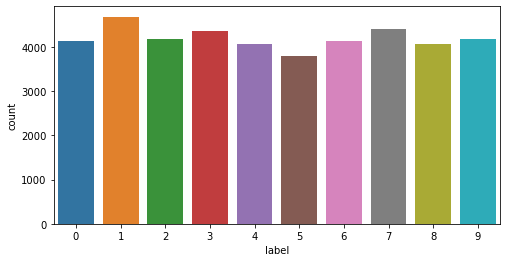

In [6]:
plt.figure(figsize=(8,4))
sns.countplot(train_df['label'])
plt.show()

In [7]:
x_train = train_df.drop(labels = ['label'], axis = 1)
x_train.head(1)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y_train = train_df['label']
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

# **Data Preprocessing**

In [9]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_train = x_train / 255.0

In [10]:
y_train = to_categorical(y_train, num_classes=10)

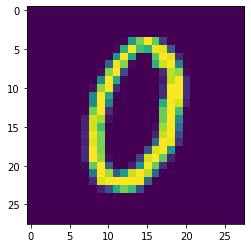

In [11]:
plt.imshow(x_train[5][:,:,0])
plt.show()

In [12]:
y_train[5]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# **Model Building**

In [13]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(lr=0.01)

# **Compiling the Model**

In [14]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [15]:
epochs=20
batch_size=64
model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size)

Epoch 1/20
657/657 [==============================] - 3s 5ms/step - loss: 0.2719 - accuracy: 0.9130
Epoch 2/20
657/657 [==============================] - 3s 5ms/step - loss: 0.0964 - accuracy: 0.9717
Epoch 3/20
657/657 [==============================] - 3s 5ms/step - loss: 0.0753 - accuracy: 0.9774
Epoch 4/20
657/657 [==============================] - 3s 5ms/step - loss: 0.0643 - accuracy: 0.9808
Epoch 5/20
657/657 [==============================] - 3s 5ms/step - loss: 0.0568 - accuracy: 0.9830
Epoch 6/20
657/657 [==============================] - 3s 5ms/step - loss: 0.0507 - accuracy: 0.9840
Epoch 7/20
657/657 [==============================] - 3s 4ms/step - loss: 0.0441 - accuracy: 0.9865
Epoch 8/20
657/657 [==============================] - 3s 5ms/step - loss: 0.0437 - accuracy: 0.9866
Epoch 9/20
657/657 [==============================] - 3s 5ms/step - loss: 0.0395 - accuracy: 0.9880
Epoch 10/20
657/657 [==============================] - 3s 5ms/step - loss: 0.0397 - accuracy: 0.9879

In [16]:
test_df= pd.read_csv('../input/digit-recognizer/test.csv')
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
x_test = test_df.values.reshape(-1, 28, 28, 1)
x_test = x_test / 255.0

In [18]:
y_test=model.predict(x_test)

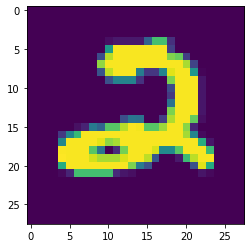

In [19]:
plt.imshow(x_test[0][:,:,0])
plt.show()

In [20]:
y_test[0]

array([5.7697011e-12, 1.1049291e-11, 1.0000000e+00, 3.0115641e-10,
       1.1256978e-10, 1.0362010e-14, 5.6531971e-12, 1.0773066e-09,
       1.6320117e-10, 1.6557893e-12], dtype=float32)

In [21]:
y_test=[np.argmax(y_test1) for y_test1 in y_test]

In [22]:
y_test[0]

2

In [23]:
submission = pd.DataFrame({'ImageId' : [i+1 for i in range(len(y_test))] , 'Label' : y_test})

In [24]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [25]:
submission.to_csv('./submission.csv', index = False)